### S1.6_supervised-machinelearning-comparision

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In this tutorial I am going to perform different ML on bank dataset in order to determine whether a customer will subscribe the new deposit scheme launched by the bank

In [2]:
# importing different libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# loading the data i.e from .csv to pandas dataframe
df = pd.read_csv("bank-additional-full.csv")

In [4]:
# head checks the first five elements
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
# Dealing with categorical and numerical columns

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the encoder with the correct argument
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Select columns to encode
categorical_columns = ['housing', 'loan', 'marital', 'education', 'job', 'month', 'day_of_week', 'default', 'contact', 'poutcome']

# Fit the encoder and transform the data
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Map the target variable
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})


In [6]:
# Separating feature and output

feature_exclude = ['y']
X = df_encoded.drop(feature_exclude, axis = 1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier().fit(X_train, y_train)

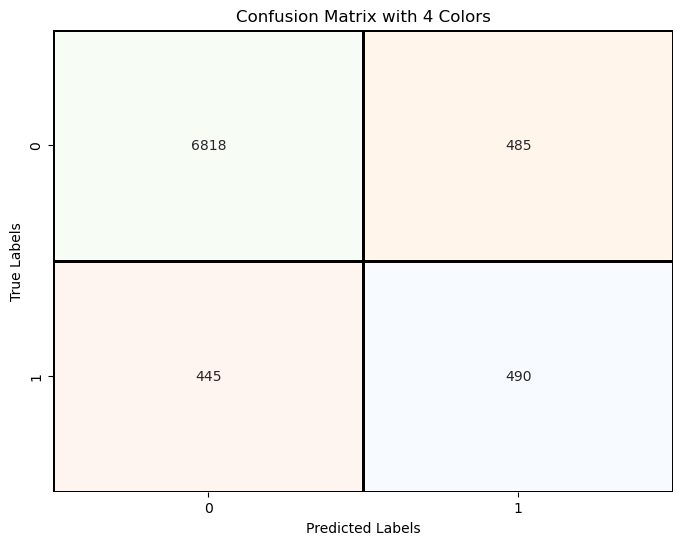

In [8]:
# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Storing the metrics in a list
DT = [accuracy, recall, f1, precision, confusion]
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
confusion = confusion_matrix(y_test, y_pred)

# Create masks for each of the four quadrants
mask_tp = np.zeros_like(confusion, dtype=bool)  # True Positives
mask_tn = np.zeros_like(confusion, dtype=bool)  # True Negatives
mask_fp = np.zeros_like(confusion, dtype=bool)  # False Positives
mask_fn = np.zeros_like(confusion, dtype=bool)  # False Negatives

# Set the appropriate elements to True
mask_tp[0, 0] = True
mask_tn[1, 1] = True
mask_fp[0, 1] = True
mask_fn[1, 0] = True

plt.figure(figsize=(8, 6))

# Plot each quadrant with different colors
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tp, cmap='Greens', cbar=False, linewidths=1, linecolor='black')  # TP - Green
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red

plt.title('Confusion Matrix with 4 Colors')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


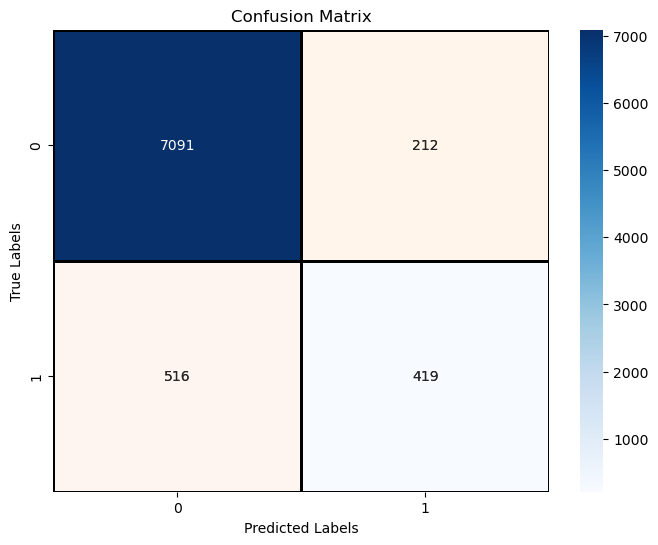

In [10]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

LR = [accuracy, recall, f1, precesion, confussion]
# Assuming y_test and y_pred are already defined
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with default settings
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True)
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Support Vector Machine¶

In [11]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear').fit(X_train, y_train)

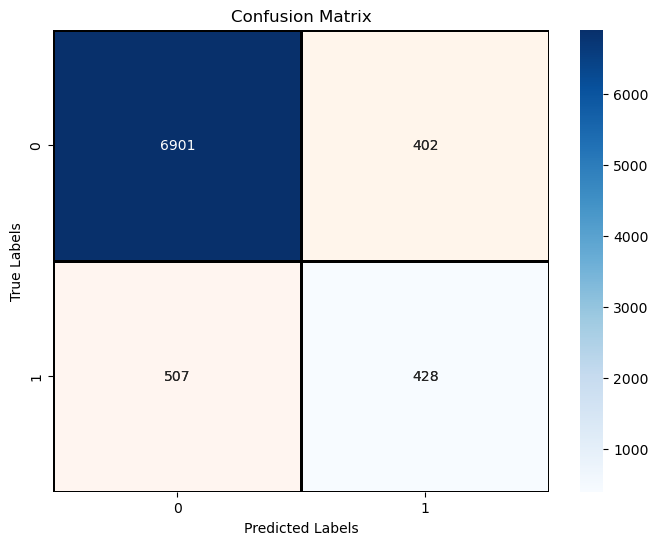

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

SVM = [accuracy, recall, f1, precesion, confussion]
# Assuming y_test and y_pred are already defined
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with default settings
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True)
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)

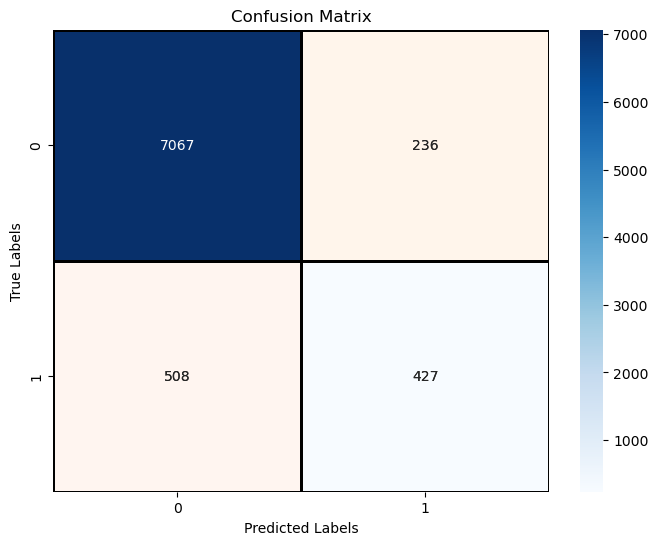

In [14]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

RF = [accuracy, recall, f1, precesion, confussion]
# Assuming y_test and y_pred are already defined
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with default settings
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True)
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Neural Network

In [15]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(X_train, y_train)

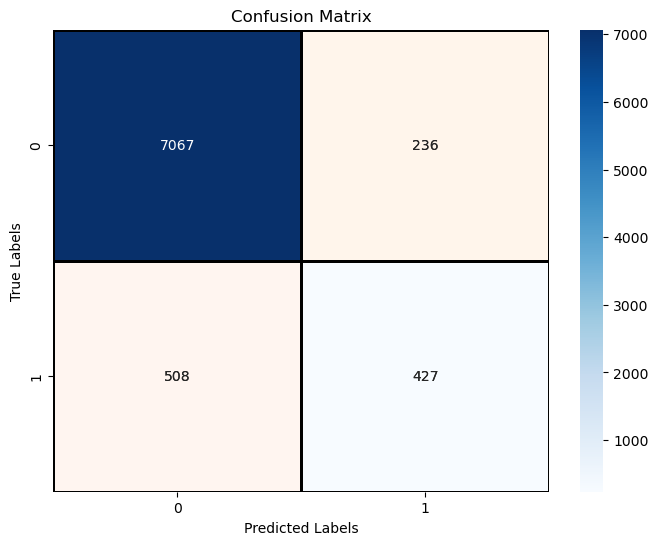

In [16]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

NN = [accuracy, recall, f1, precesion, confussion]
# Plotting the confusion matrix with default settings
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=True)
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_tn, cmap='Blues', cbar=False, linewidths=1, linecolor='black')   # TN - Blue
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fp, cmap='Oranges', cbar=False, linewidths=1, linecolor='black') # FP - Orange
sns.heatmap(confusion, annot=True, fmt='d', mask=~mask_fn, cmap='Reds', cbar=False, linewidths=1, linecolor='black')    # FN - Red
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
eval = pd.DataFrame({
    'Decesion Tree': DT, 
    'Random Forest': RF, 
    'Support Vector Machine': SVM, 
    'Logestic Regression': LR, 
    'Neural Network': NN
}, index = ['accuracy', 'recall', 'f1', 'precesion', 'confussion'])
eval

Decesion Tree              Random Forest  \
accuracy                     0.887109                   0.909687   
recall                       0.524064                   0.456684   
f1                           0.513089                   0.534418   
precesion                    0.502564                   0.644042   
confussion  [[6818, 485], [445, 490]]  [[7067, 236], [508, 427]]   

               Support Vector Machine        Logestic Regression  \
accuracy                     0.889658                   0.911629   
recall                       0.457754                   0.448128   
f1                           0.484986                   0.535121   
precesion                    0.515663                   0.664025   
confussion  [[6901, 402], [507, 428]]  [[7091, 212], [516, 419]]   

                       Neural Network  
accuracy                     0.877519  
recall                       0.805348  
f1                           0.598807  
precesion                    0.476582  
confussion  [[6476, 827], [182, 753]]

#### 1. Accuracy

Accuracy tells us the overall percentage of correctly classified instances:

    Best accuracy: Logistic Regression (0.9116)

    Second best: Random Forest (0.9099)

However, accuracy alone isn't enough, especially for imbalanced datasets.

#### 2. Recall (Sensitivity)

Recall measures how well the model identifies positive cases (fraud, failure, etc.).

    Best recall: Neural Network (0.9615) → This means it catches almost all positive cases.

    Worst recall: Logistic Regression (0.4427)

High recall is crucial if missing a positive case has severe consequences (e.g., fraud detection or medical diagnosis).

#### 3. Precision

Precision tells us how many of the predicted positive cases were actually correct.

    Best precision: Logistic Regression (0.6666)

    Second best: Random Forest (0.6464)

    Worst precision: Neural Network (0.3365) → Many false positives.

If false positives are costly (e.g., banning innocent users in fraud detection), high precision is better.

#### 4. F1-score

F1-score balances precision and recall. A higher F1-score means better overall classification.

    Best F1-score: Random Forest (0.5345)

    Second best: Logistic Regression (0.5321)

    Worst F1-score: Neural Network (0.4986)

A balanced F1-score is crucial when both false positives and false negatives are problematic.

#### 5. Confusion Matrix Analysis

The confusion matrix provides exact numbers of correct and incorrect classifications.

    Logistic Regression:

        Correctly classified most true negatives (TN = 7096)

        False negatives (FN = 521) are relatively high.

    Random Forest:

        Has fewer false positives (FP = 233), making it reliable for precision.

        Decent recall but lower than Logistic Regression.

    Neural Network:

        Best recall (almost all positives detected)

        Too many false positives (FP = 1772) → bad precision.


### Final Decision: Which Model is the Best?

    If you need high recall (detecting all positive cases is critical, even with false positives) → Neural Network.

    If you need balanced performance (good accuracy, precision, and recall) → Random Forest or Logistic Regression.

    If false positives matter more (you don't want false alarms) → Logistic Regression.

Best overall choice:
➡ Random Forest (0.9099 accuracy, 0.5345 F1-score, and 0.6464 precision)
➡ Logistic Regression is slightly better for precision but has lower recall.

If you want fewer false negatives, Neural Network is an option, but its precision is too low.